In [75]:
!{sys.executable} -m pip install skimpy

import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import skimpy
import warnings

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from sklearn import set_config
from colorama import Style, Fore

Defaulting to user installation because normal site-packages is not writeable


In [76]:
pd.set_option('display.max_rows', 100)
set_config(transform_output = 'pandas')
pd.options.mode.chained_assignment = None
warnings.simplefilter(action='ignore', category=FutureWarning)

import os
for dirname, _, filenames in os.walk("C:/For Internships & Job Applications/personal project/Wine Clustering"):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [77]:
%matplotlib inline
from collections import Counter
from sklearn.cluster import KMeans

## Exploratory Data Analysis

In [78]:
df = pd.read_csv("wine-clustering.csv")
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [80]:
print(f"{Style.BRIGHT}{Fore.BLUE} SHAPE")
print(f'{Style.BRIGHT}{Fore.BLUE} -> train: {Fore.GREEN} {df.shape}')

print(f"\n\n{Style.BRIGHT}{Fore.BLUE} NULL VALUES")
print(f"{Style.BRIGHT}{Fore.BLUE} -> Train: {Fore.GREEN} {df.isnull().any().any()}")

 SHAPE
 -> train:  (178, 13)


 NULL VALUES
 -> Train:  False


In [81]:
df.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')

In [82]:
skimpy.skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 178    │ │ float64     │ 11    │                                                          │
│ │ Number of columns │ 13     │ │ int32       │ 2     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name            ┃ NA  ┃ NA %  ┃ mean    ┃ sd     ┃ p0    ┃ p25    ┃ p50   ┃ p75    ┃ p100  ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━┩  │
│ │ Alcohol                │   0 │     0 │      13 │ 0.8118 │ 11.03 │  12.36 │ 13.05 │  13.68 │ 14.83 │ ▂▆▇▇▇▂ │  │
│ │ Malic_Acid             │   0 │     0 │   2.336 │  1.117 │  0.74 │  1.603 │ 1.865 │  3.083 │   5.8 │ ▅▇▃▃▁▁ │  │
│ │ Ash                    │   0 │     0 │   2.367 │ 0.2743 │  1.36 │   2.21 │  2.36 │  2.558 │  3.23 │  ▂▆▇▃  │  │
│ │ Ash_Alcanity           │   0 │     0 │   19.49 │   3.34 │  10.6 │   17.2 │  19.5 │   21.5 │    30 │ ▁▅▇▅▂  │  │
│ │ Magnesium              │   0 │     0 │   99.74 │  14.28 │    70 │     88 │    98 │    107 │   162 │  ▂▇▅▂  │  │
│ │ Total_Phenols          │   0 │     0 │   2.295 │ 0.6259 │  0.98 │  1.742 │ 2.355 │    2.8 │  3.88 │ ▃▇▆▇▅▁ │  │
│ │ Flavanoids             │   0 │     0 │   2.029 │ 0.9989 │  0.34 │  1.205 │ 2.135 │  2.875 │  5.08 │ ▇▆▇▇▁  │  │
│ │ Nonflavanoid_Phenols   │   0 │     0 │  0.3619 │ 0.1245 │  0.13 │   0.27 │  0.34 │ 0.4375 │  0.66 │ ▃▇▅▅▃▂ │  │
│ │ Proanthocyanins        │   0 │     0 │   1.591 │ 0.5724 │  0.41 │   1.25 │ 1.555 │   1.95 │  3.58 │ ▃▇▇▃▁  │  │
│ │ Color_Intensity        │   0 │     0 │   5.058 │  2.318 │  1.28 │   3.22 │  4.69 │    6.2 │    13 │ ▆▇▆▃▂  │  │
│ │ Hue                    │   0 │     0 │  0.9574 │ 0.2286 │  0.48 │ 0.7825 │ 0.965 │   1.12 │  1.71 │ ▃▅▇▅▁  │  │
│ │ OD280                  │   0 │     0 │   2.612 │   0.71 │  1.27 │  1.938 │  2.78 │   3.17 │     4 │ ▅▅▃▇▇▂ │  │
│ │ Proline                │   0 │     0 │   746.9 │  314.9 │   278 │  500.5 │ 673.5 │    985 │  1680 │ ▇▇▃▃▂▁ │  │
│ └────────────────────────┴─────┴───────┴─────────┴────────┴───────┴────────┴───────┴────────┴───────┴────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

## K-Means Model fitting

In [83]:
## Try n_clusters = 4
df_Kmeans = df.copy()
kmeans = KMeans(n_clusters=2)
kmeans.fit(df_Kmeans)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=2)

In [84]:
pred = kmeans.predict(df_Kmeans)
pred

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

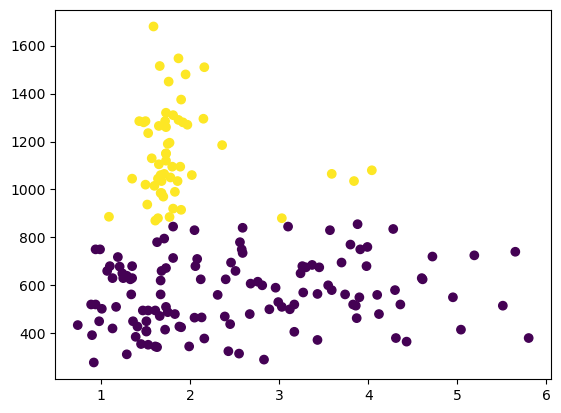

In [85]:
plt.scatter(x=df_Kmeans.loc[:, ["Malic_Acid"]], 
            y=df_Kmeans.loc[:, ["Proline"]], c=pred)

In [86]:
silhouette_score(df_Kmeans, labels=kmeans.labels_, metric='cosine')

0.4907934922782961

## Hierarchical clustering

In [87]:
df_hier = df.copy()
AgglomerativeC = AgglomerativeClustering(n_clusters=4, affinity='euclidean',
                                         linkage="average")

In [88]:
AgglomerativeC

AgglomerativeClustering(affinity='euclidean', linkage='average', n_clusters=4)

In [89]:
y_AgglomerativeC_blob = AgglomerativeC.fit_predict(df_hier)

In [90]:
y_AgglomerativeC_blob

array([0, 0, 0, 2, 3, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 3, 3, 3,
       0, 0, 3, 3, 0, 0, 3, 0, 0, 2, 0, 0, 0, 3, 3, 0, 0, 3, 3, 0, 0, 3,
       3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 1, 1, 1, 3,
       1, 1, 3, 3, 3, 1, 1, 0, 3, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1,
       3, 1, 1, 1, 1, 1, 1, 0, 1, 1, 3, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 3,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 3, 3, 3, 1, 1, 1, 1, 3, 1, 1, 3, 3, 1, 1, 3, 1, 1, 1, 1, 3,
       1, 3, 1, 3, 3, 1, 1, 3, 1, 3, 1, 1, 3, 3, 3, 1, 1, 1, 3, 3, 3, 3,
       3, 1], dtype=int64)

In [91]:
df_hier["Cluster"] = y_AgglomerativeC_blob

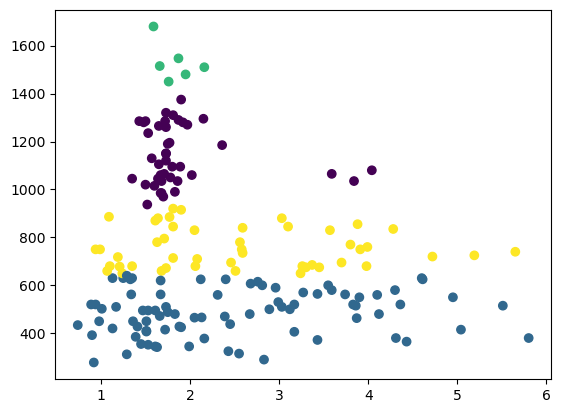

In [92]:
plt.scatter(x=df_hier.loc[:, ["Malic_Acid"]], 
            y=df_hier.loc[:, ["Proline"]], c=df_hier["Cluster"])

In [93]:
silhouette_score(df_hier, labels=AgglomerativeC.labels_, metric='cosine')

0.19329341813904996

## AffinityPropagation

In [94]:
from sklearn.cluster import AffinityPropagation

df_Aff= df.copy()
AffinityP = AffinityPropagation(affinity='euclidean', verbose=True)

In [95]:
AffinityP

AffinityPropagation(verbose=True)

In [96]:
y_AffinityP_blob = AffinityP.fit_predict(df_Aff)

Converged after 105 iterations.


In [97]:
y_AffinityP_blob

array([2, 2, 3, 0, 4, 0, 3, 3, 2, 2, 0, 3, 3, 2, 0, 3, 3, 2, 0, 1, 4, 4,
       2, 2, 1, 1, 3, 3, 1, 2, 3, 0, 2, 3, 2, 1, 1, 2, 2, 4, 4, 2, 2, 4,
       1, 2, 2, 2, 2, 3, 2, 3, 3, 3, 2, 2, 1, 3, 3, 7, 4, 7, 6, 7, 5, 4,
       7, 7, 4, 4, 1, 5, 7, 2, 1, 7, 5, 7, 4, 7, 5, 4, 6, 7, 7, 7, 7, 6,
       4, 6, 7, 7, 7, 5, 5, 1, 6, 7, 4, 5, 4, 6, 7, 5, 4, 5, 7, 7, 5, 4,
       6, 5, 6, 7, 5, 5, 7, 5, 5, 6, 6, 7, 5, 5, 5, 5, 5, 7, 5, 6, 6, 7,
       6, 6, 6, 4, 4, 7, 6, 6, 6, 4, 7, 6, 1, 1, 5, 6, 6, 6, 7, 7, 7, 4,
       6, 4, 7, 1, 4, 6, 7, 4, 6, 4, 6, 7, 4, 4, 4, 6, 7, 7, 4, 4, 4, 1,
       1, 6], dtype=int64)

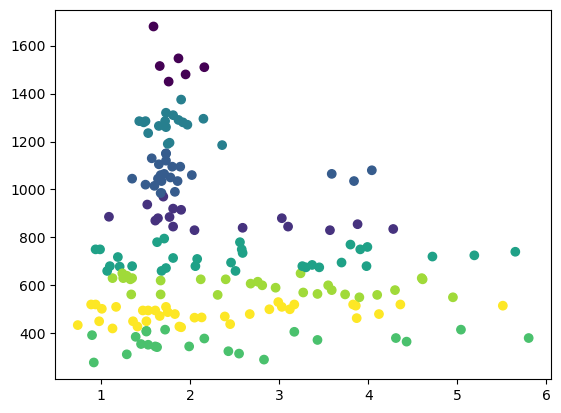

In [98]:
df_Aff["Cluster"] = y_AffinityP_blob
plt.scatter(x=df_Aff.loc[:, ["Malic_Acid"]], 
            y=df_Aff.loc[:, ["Proline"]], c=df_Aff["Cluster"])

In [99]:
silhouette_score(df_Aff, labels=AffinityP.labels_, metric='euclidean')

0.5352947972115797